# CONSTANTS

In [17]:
N_RANGE=[11]; RANDOM_STATES=[17]
# N_RANGE=[5,6,7,8,9,10,11]; RANDOM_STATES=[0, 17]
# N_RANGE=range(5, 12); RANDOM_STATES=[0, 3, 5, 8, 11, 16, 17, 20, 21, 24]

RANDOM_ALPHA = True
NUM_ZERO_COLUMNS_TO_HSTACK = 10 # effective only if hstack_zeros is True

trials_out = {}

PLOT_LEARNING_CURVES = True
PLOT_INPUT = True

RUN_DNN = True
RUN_DNN_ZEROS = True
RUN_DNN_WIN_SLIDING_AVG = False
RUN_DNN_WIN_SLIDING_AVG_ZEROS = False
RUN_DNN_SLIDING_SUM = False
RUN_DNN_SLIDING_SUM_ZEROS = False
RUN_DNN_WIN = False
RUN_DNN_WIN_ZEROS = False
RUN_CNN = True
RUN_CNN_ZEROS = True
RUN_CNNM = True


# Import function library

In [18]:
%run yulesimon-lib.ipynb

# Debug helpers

In [12]:
def debug_summary(trial):
    if PLOT_INPUT:
        trial_plot_input(trial['input_sample'])
    if PLOT_LEARNING_CURVES:
        trial_plot_learning_curves(trial)

# helper function to plot learning curves for the given trial output
def trial_plot_learning_curves(trial):
    history_path = '{}.history'.format(trial['base_path'])
    history = pickle.load(open(history_path, 'rb'))
    plot_learning_curves(history)

# helper function to plot input shape
def trial_plot_input(x):
    z = x.flatten()
    _ = plt.scatter(range(len(z)), z, s=5, color="blue", label="original")

# DNN

In [ ]:
%%time
if RUN_DNN:
    nn = 'DNN'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])


# DNN zeros

In [ ]:
%%time
if RUN_DNN_ZEROS:
    nn = 'DNN_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# DNN sliding-avg test

In [ ]:
X_moving_avg_test = np.array([ [1,2,3,4,5,6,7], [1,2,3,4,5,6,7] ])

print('X_moving_avg_test:')
print(X_moving_avg_test)

OUT_moving_avg_test, window_sizes = data_hstack_moving_avg(X_moving_avg_test)

print()
print('window_sizes:', window_sizes)

print()
print('OUT_moving_avg_test:')
print(OUT_moving_avg_test)

# DNN sliding-avg

In [ ]:
%%time
if RUN_DNN_WIN_SLIDING_AVG:
    nn = 'DNN_SLIDING_AVG'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# DNN sliding-avg zeros

In [ ]:
%%time
if RUN_DNN_WIN_SLIDING_AVG_ZEROS:
    nn = 'DNN_SLIDING_AVG'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# DNN sliding-sum

In [ ]:
%%time
if RUN_DNN_SLIDING_SUM:
    nn = 'DNN_SLIDING_SUM'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# DNN sliding-sum zeros

In [ ]:
%%time
if RUN_DNN_SLIDING_SUM_ZEROS:
    nn = 'DNN_SLIDING_SUM_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# DNN win test
Test to show that 'data_hstack_win_sum()' is working correctly

In [ ]:
X_win_test = np.array([ [1,2,3,4,5,6,7], [1,2,3,4,5,6,7] ])

print('X_win_test:')
print(X_win_test)

OUT_win_test, window_sizes = data_hstack_win_sum(X_win_test)

print()
print('window_sizes:', window_sizes)

print()
print('OUT_win_test:')
print(OUT_win_test)

# DNN win

In [ ]:
%%time
if RUN_DNN_WIN:
    nn = 'DNN_WIN'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# DNN win zeros

In [ ]:
%%time
if RUN_DNN_WIN_ZEROS:
    nn = 'DNN_WIN_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# CNN

In [ ]:
%%time
if RUN_CNN:
    nn = 'CNN'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# CNN zeros

In [ ]:
%%time
if RUN_CNN_ZEROS:
    nn = 'CNN_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# CNN multi-layer

Processing...

input.shape: (10000, 140)
N: 2048  avg_sqrt_mse = 0.00106

loss: 0.00000497
val_loss: 0.00000089
CPU times: user 11min 37s, sys: 33.2 s, total: 12min 10s
Wall time: 3min 36s


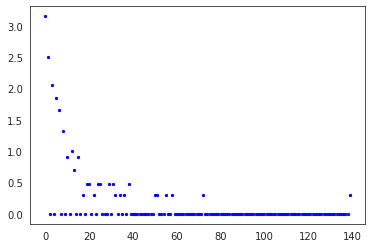

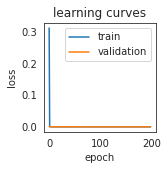

In [19]:
%%time
if RUN_CNNM:
    nn = 'CNNM'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=False, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# CNN multi-layer + zeros

In [ ]:
%%time
if RUN_CNNM:
    nn = 'CNNM_ZEROS'
    trials_out[nn] = trial(nn=nn, N_range=N_RANGE, hstack_zeros=True, random_states=RANDOM_STATES)
    debug_summary(trials_out[nn])

# plot log(N) vs sqrt_mse (all trials)

In [ ]:
def plot_sqrt_mse(plot_std=False):
    
    plt.figure(figsize=(15, 4))
    
    ax1 = plt.subplot(1, 2, 1)

    ax1.set(title='sqrt_mse', xlabel='log(N)', ylabel='sqrt_mse')

    colors = iter(cm.rainbow(np.linspace(0, 1, len(trials_out))))

    for trial in trials_out:
        out = trials_out[trial]
        x = np.log10(out['a_N'])
        y = out['a_sqrt_mse']
        c = next(colors)
        ax1.plot(x, y, linewidth=0.5, c=c, marker='o', markersize=3, label=trial)
        if plot_std:
            std = out['a_std_abs_errors']
            ax1.fill_between(x, y - std, y + std, facecolor=colors[i], alpha=0.3)
    
    plt.legend(loc='upper right')

plot_sqrt_mse()


# print and save statistics (yulesimon.csv)

In [ ]:
dict_list = []
for trial in trials_out:
    t = trials_out[trial]
    dict_list.append(('N', t['a_N']))
for trial in trials_out:
    t = trials_out[trial]
    dict_list.append(('sqrt_mse_{}'.format(trial), t['a_sqrt_mse']))
for trial in trials_out:
    t = trials_out[trial]
    dict_list.append(('std_{}'.format(trial), t['a_std_abs_errors']))
for trial in trials_out:
    t = trials_out[trial]
    dict_list.append(('avg_abs_error_{}'.format(trial), t['a_avg_abs_errors']))

df = pd.DataFrame(dict(dict_list))

df = df.set_index('N')

df.to_csv('yulesimon.csv', float_format='%.5f')

columns=[]
for t in trials_out:
    columns.append(('sqrt_MSE', trial))
for t in trials_out:
    columns.append(('STD', trial))
for t in trials_out:
    columns.append(('avg_abs_err', trial))

df.columns=pd.MultiIndex.from_tuples(columns)

print('err = y_test - y_pred')
df

## $mse$ comparison

In [ ]:
dict_list_mse = []
for trial in trials_out:
    t = trials_out[trial]
    dict_list_mse.append(('N', t['a_N']))
    dict_list_mse.append((f'{trial}', t['a_sqrt_mse']))

df = pd.DataFrame(dict(dict_list_mse))

df = df.set_index('N')

df

## $STD$ comparison

In [ ]:
dict_list_std = []
for trial in trials_out:
    t = trials_out[trial]
    dict_list_std.append(('N', t['a_N']))
    dict_list_std.append((f'{trial}', t['a_std_abs_errors']))

df = pd.DataFrame(dict(dict_list_std))

df = df.set_index('N')
print(df)

## T-TEST

In [3]:
t, p = model_compare(nn1='DNN', nn2='CNN', 
                  num_tests=10, 
                  N_pow=6, 
                  random_alpha=True, 
                  num_alphas=100, 
                  samples_per_alpha=100, 
                  hstack_zeros=False)

generating data, random-state: 45
input.shape: (10000, 17)
training model: DNN...
training model: CNN...
generating data, random-state: 34
input.shape: (10000, 15)
training model: DNN...
training model: CNN...
generating data, random-state: 67
input.shape: (10000, 35)
training model: DNN...
training model: CNN...
generating data, random-state: 9
input.shape: (10000, 7)
training model: DNN...
training model: CNN...
generating data, random-state: 59
input.shape: (10000, 31)
training model: DNN...
training model: CNN...
generating data, random-state: 28
input.shape: (10000, 13)
training model: DNN...
training model: CNN...
generating data, random-state: 14
input.shape: (10000, 15)
training model: DNN...
training model: CNN...
generating data, random-state: 13
input.shape: (10000, 28)
training model: DNN...
training model: CNN...
generating data, random-state: 33
input.shape: (10000, 17)
training model: DNN...
training model: CNN...
generating data, random-state: 73
input.shape: (10000, 20

In [8]:
t, p = model_compare(nn1='CNN', nn2='CNN_ZEROS', 
                  num_tests=10, 
                  N_pow=6, 
                  random_alpha=True, 
                  num_alphas=100, 
                  samples_per_alpha=100, 
                  hstack_zeros=False)


generating data, random-state: 26
input.shape: (10000, 20)
training model: CNN...
training model: CNN_ZEROS...
generating data, random-state: 95
input.shape: (10000, 45)
training model: CNN...
training model: CNN_ZEROS...
generating data, random-state: 97
input.shape: (10000, 52)
training model: CNN...
training model: CNN_ZEROS...
generating data, random-state: 24
input.shape: (10000, 14)
training model: CNN...
training model: CNN_ZEROS...
generating data, random-state: 91
input.shape: (10000, 13)
training model: CNN...
training model: CNN_ZEROS...
generating data, random-state: 10
input.shape: (10000, 15)
training model: CNN...
training model: CNN_ZEROS...
generating data, random-state: 73
input.shape: (10000, 20)
training model: CNN...
training model: CNN_ZEROS...
generating data, random-state: 35
input.shape: (10000, 18)
training model: CNN...
training model: CNN_ZEROS...
generating data, random-state: 70
input.shape: (10000, 26)
training model: CNN...
training model: CNN_ZEROS...
g

In [ ]:
t, p = model_compare(nn1='CNN', nn2='CNNM', 
                  num_tests=10, 
                  N_pow=6, 
                  random_alpha=True,    
                  num_alphas=100, 
                  samples_per_alpha=100, 
                  hstack_zeros=False)